In [62]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# cars24 data
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: c:\Users\subash\OneDrive\Desktop\Machine Learning Repository\ML-Linear-Logistic\ML Introduction\cars24-car-price-cleaned.csv

  0%|          | 0.00/1.69M [00:00<?, ?B/s]
 31%|███       | 524k/1.69M [00:00<00:00, 2.39MB/s]
 93%|█████████▎| 1.57M/1.69M [00:00<00:00, 3.75MB/s]
100%|██████████| 1.69M/1.69M [00:00<00:00, 3.66MB/s]


In [64]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head(2)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.2,2012.0,120000,19.7,796.0,46.3,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.5,2016.0,20000,18.9,1197.0,82.0,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0


In [65]:
df.nunique()

selling_price        964
year                  27
km_driven           4476
mileage              532
engine               167
max_power            484
age                   27
make                  41
model               3233
Individual             2
Trustmark Dealer       2
Diesel                 2
Electric               2
LPG                    2
Petrol                 2
Manual                 2
5                      2
>5                     2
dtype: int64

Converting categories columns into values using Target Encoding

Why target encoding? As the no.of unique categories is large in each column, its better than one hot encoding.

In [66]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')

df['model'] = df.groupby('model')['selling_price'].transform('mean')

In [67]:
df.head(2)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.2,2012.0,120000,19.7,796.0,46.3,11.0,4.684721,1.18000,1,0,0,0,0,1,1,1,0
1,5.5,2016.0,20000,18.9,1197.0,82.0,7.0,5.458819,4.81875,1,0,0,0,0,1,1,1,0


Scaling Data to normalize numerical feautres

Since all the feautres in diffrent ranges like 1000's and 10's, we need to scale the data.

I will start with MinMaxScaler but also check if my numeric columns follow a normal distribution. If they do, I can switch to StandardScaler if MinMaxScaler doesn’t yield the desired results.

In [68]:
df.select_dtypes(['float64', 'int64']).columns

Index(['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5'],
      dtype='object')

In [69]:
numeric_cols = df.select_dtypes(['float64', 'int64']).columns.to_list()
numeric_cols

['selling_price',
 'year',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'age',
 'make',
 'model',
 'Individual',
 'Trustmark Dealer',
 'Diesel',
 'Electric',
 'LPG',
 'Petrol',
 'Manual',
 '5',
 '>5']

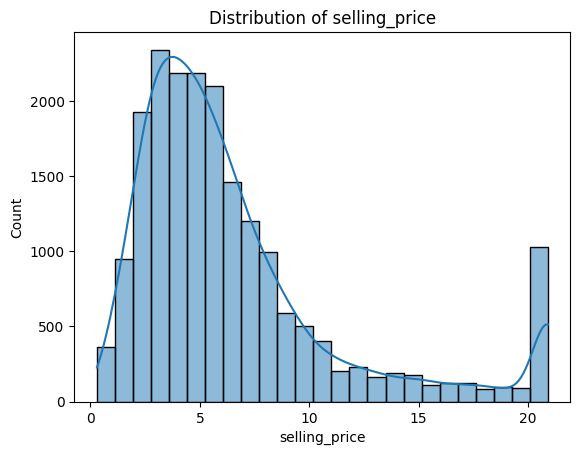

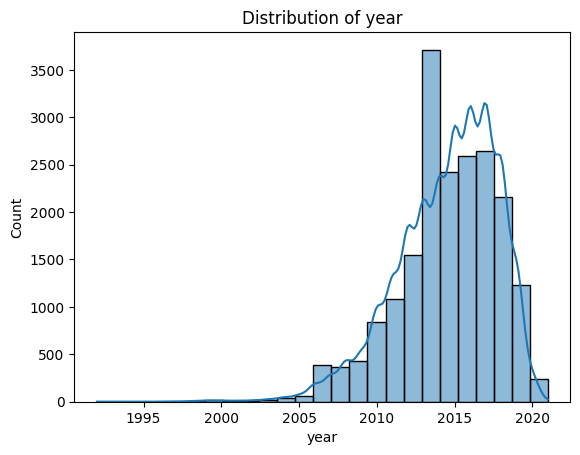

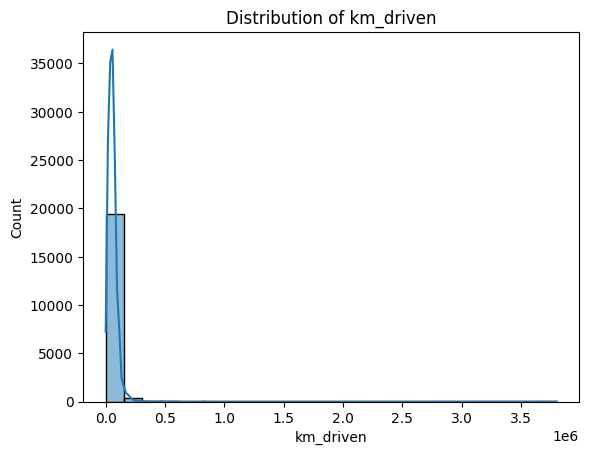

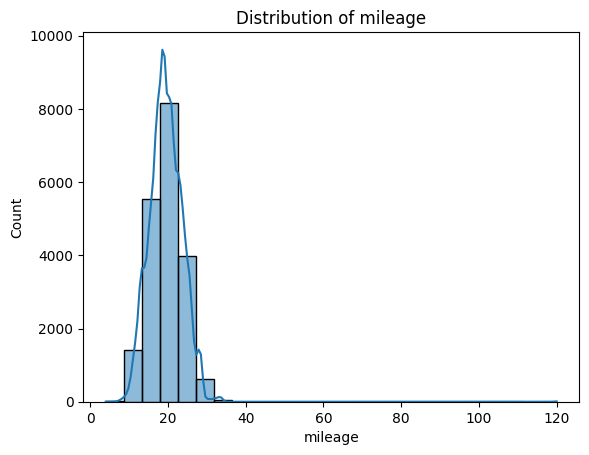

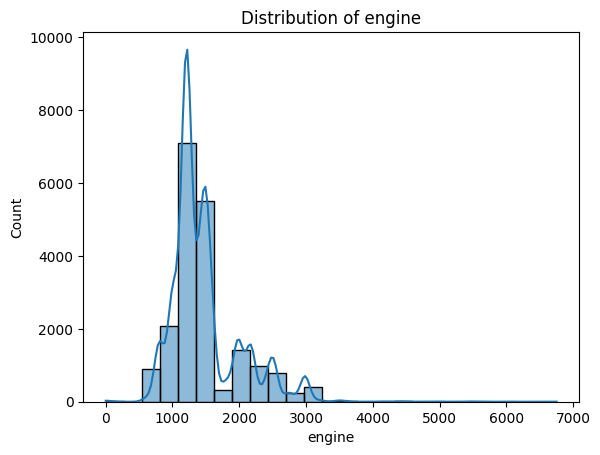

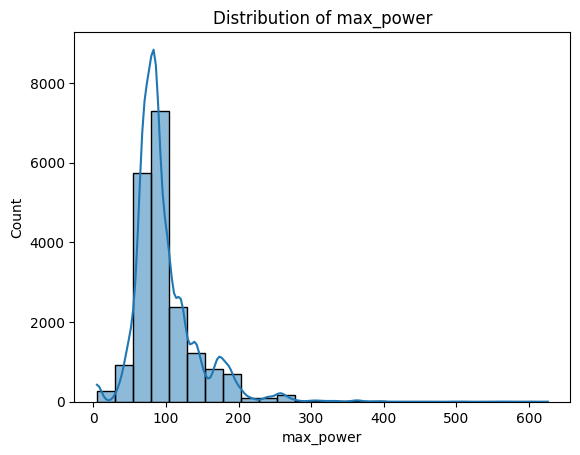

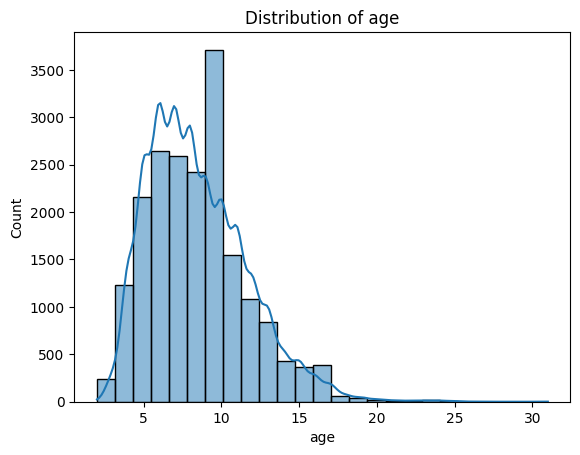

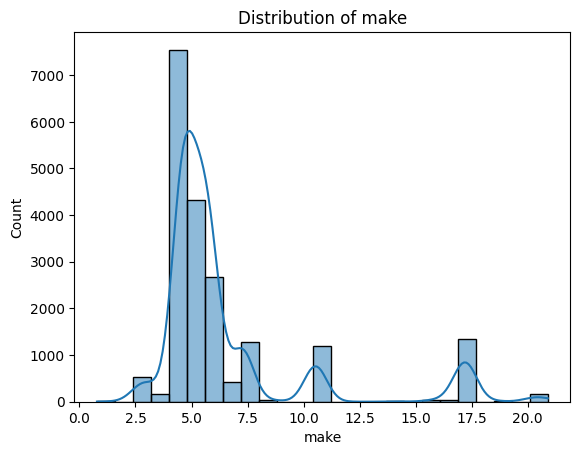

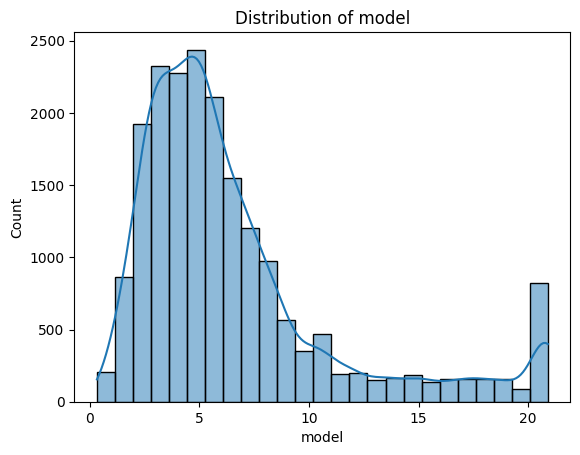

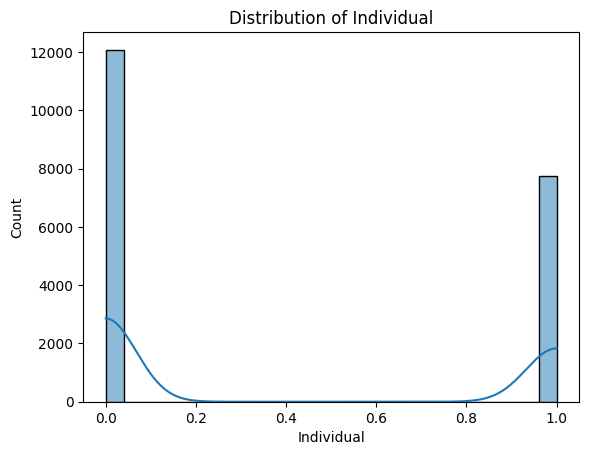

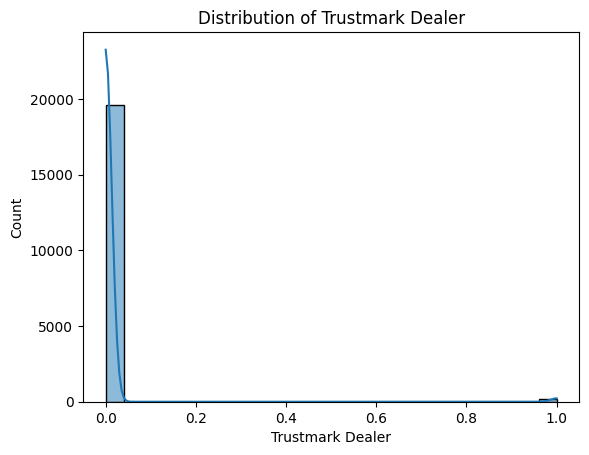

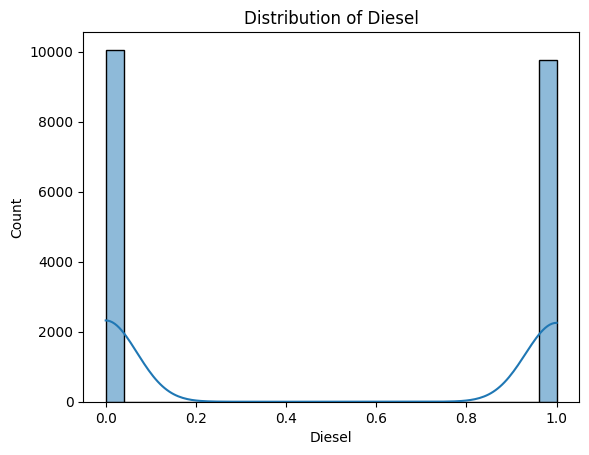

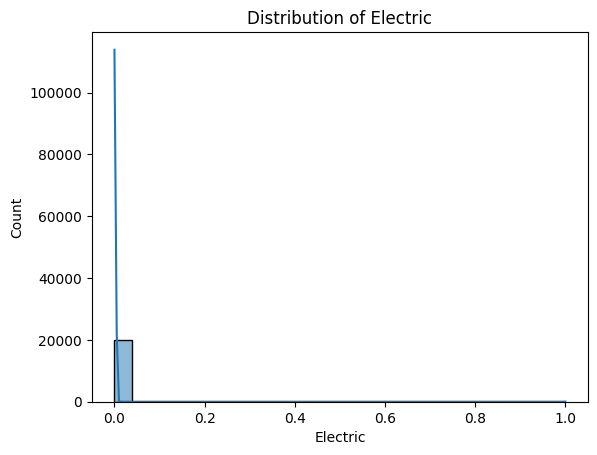

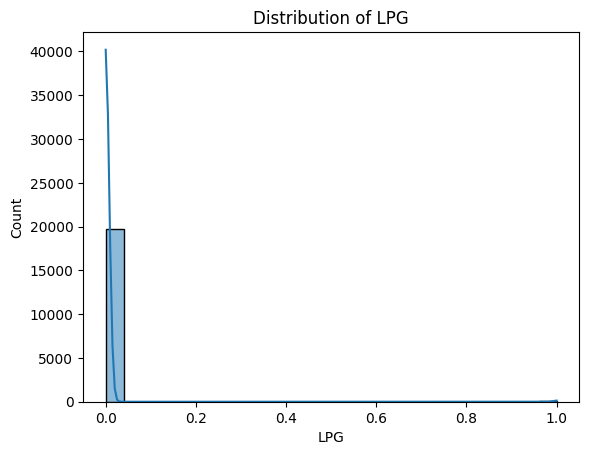

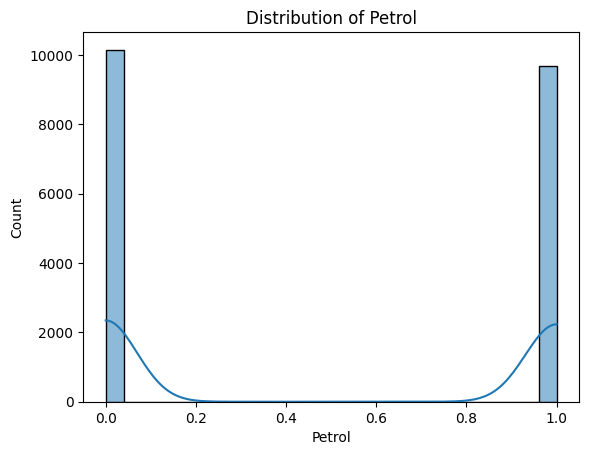

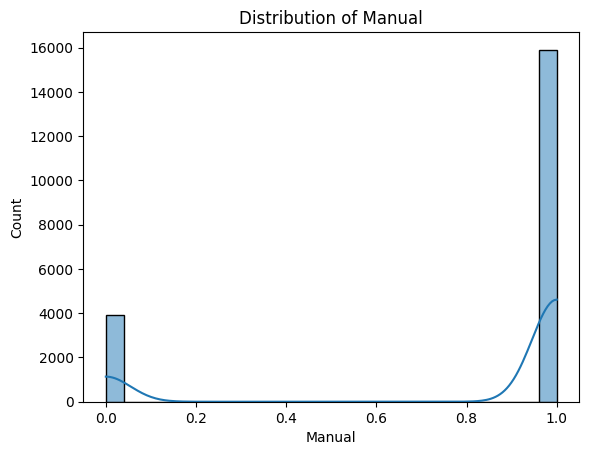

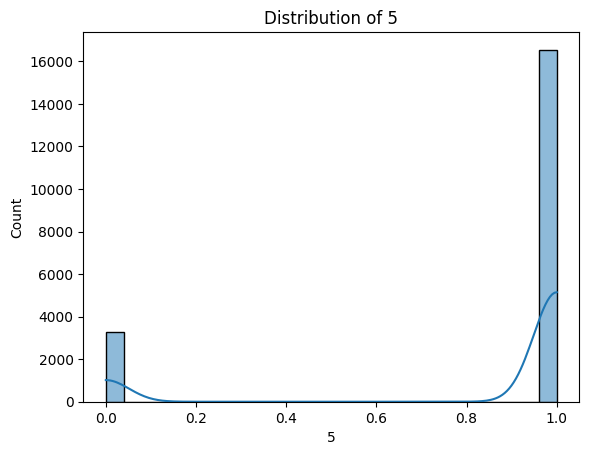

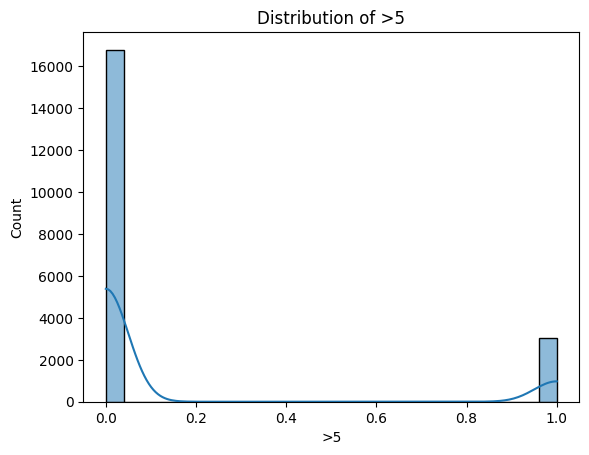

In [70]:
for col in numeric_cols:
    sns.histplot(df[col], kde = True, bins = 25)
    plt.title(f'Distribution of {col}')
    plt.show()

Visual representation proves that the data is not normally distributed, for further confirmation, I am going to check using Shapiro test.

In [71]:
from scipy.stats import shapiro

for i in numeric_cols:
    stat, p = shapiro(df[i])
    print(f'{i} : p-value {p}')

selling_price : p-value 3.2854091629364904e-91
year : p-value 1.1984991815980123e-63
km_driven : p-value 8.590911217643363e-114
mileage : p-value 4.3679539573465544e-71
engine : p-value 5.433818096797337e-86
max_power : p-value 1.4509233294591989e-89
age : p-value 1.1984991818308342e-63
make : p-value 9.329966023912938e-108
model : p-value 1.7688577702980788e-91
Individual : p-value 8.827719715900686e-109
Trustmark Dealer : p-value 1.789552971656726e-133
Diesel : p-value 1.5049729939286663e-107
Electric : p-value 2.0189240172145443e-135
LPG : p-value 1.0762327976579718e-134
Petrol : p-value 1.4718009056627393e-107
Manual : p-value 9.936878399618715e-117
5 : p-value 9.233547353714421e-119
>5 : p-value 1.3923579041744611e-119


c:\Users\subash\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19820.
  res = hypotest_fun_out(*samples, **kwds)


Since all numeric columns do not follow a normal distribution, using MinMaxScaler is a better choice than StandardScaler.

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Since all the values has been changed to numeric we are goint to use the comple df

df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head(2)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


**Split Data for Training**

In [73]:
from sklearn.model_selection import train_test_split

y = df['selling_price']
X = df.drop('selling_price',axis = 1)
y.shape, x.shape

((19820,), (19820, 17))

Now let's split the data.

We will divide it into 70:30 ratio:
- 70% for training,
- and 30% for testing.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =1)

In [75]:
X_train.shape, y_train.shape

((13874, 17), (13874,))

In [76]:
X_test.shape, y_test.shape

((5946, 17), (5946,))

This is multivariate Linear regression, since we are uusing more than 2 feautres

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

These are weights of the model

In [78]:
model.coef_

array([ 0.12588418, -0.25016952, -0.228541  ,  0.07508445,  0.04530473,
       -0.12588418,  0.06460638,  0.86034164, -0.00702006, -0.00703094,
        0.00672347,  0.1292155 ,  0.01603964, -0.00661902, -0.00390528,
       -0.01629955, -0.02359347])

In [79]:
model.intercept_

np.float64(-0.011456351039688784)

In [80]:
# r2 Score
model.score(X_train, y_train)

0.9457591024750988

In [81]:
model.score(X_test, y_test)

0.9458843076992296

We will be using feature scaling to find which is the most important feature

In [82]:
imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))), columns = ['feature', 'coeff'])
imp.head()

,feature,coeff
0,year,0.125884
1,km_driven,0.250170
2,mileage,0.228541
3,engine,0.075084
4,max_power,0.045305


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

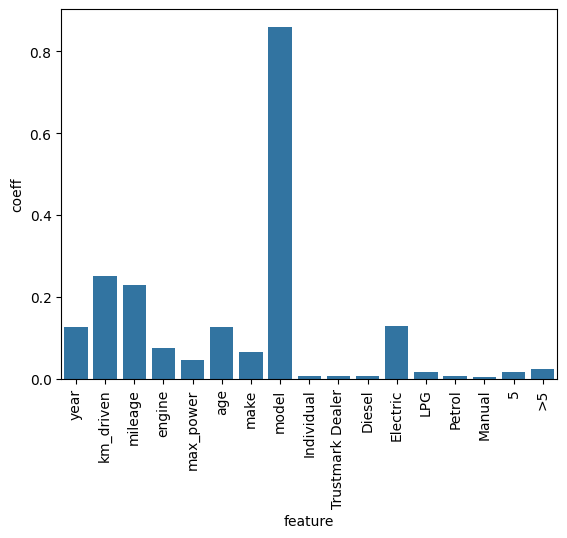

In [83]:
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

In [84]:
X_test.columns[np.argmax(np.abs(model.coef_))]

'model'

In [85]:
X_test.columns[np.argmin(np.abs(model.coef_))]

'Manual'